In [1]:
#loading necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [73]:
#IMPORTING THE MODEL LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#IMPORTING BOOTSING MODELS
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
#IMPORTING ERROR METRICS
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve,auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [3]:
#loading the finctions that would be used for preprocessing pipeline and for removing skewness and outliers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from scipy.stats import zscore

In [4]:
hr=pd.read_csv('hranalytics.csv')
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


1. In this data set we have to predict the feature attrition based on the other features.
2. So attrition is the target variable here.

# Exploratory Data Analysis

In [5]:
hr.shape

(1470, 35)

In [6]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
hr['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [8]:
#Checking the presence of null values in the data
hr.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Data has no null values. 

In [9]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

1. We can see that the data has no null values. 
2. Also there are no missing values. 
3. Mostly the features are of integer type except Attrition, Business Travel, Department, Education field, Gender, Job role, marital status, Over18, OverTime.

In [10]:
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Data visualization

Lets visualize certain features with our target variable.

Univariate analysis:

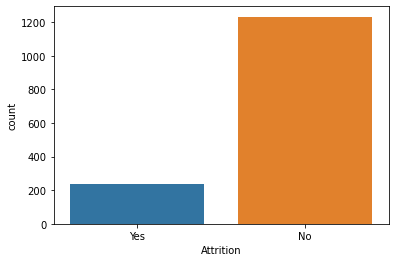

In [11]:
sns.countplot(hr['Attrition'])

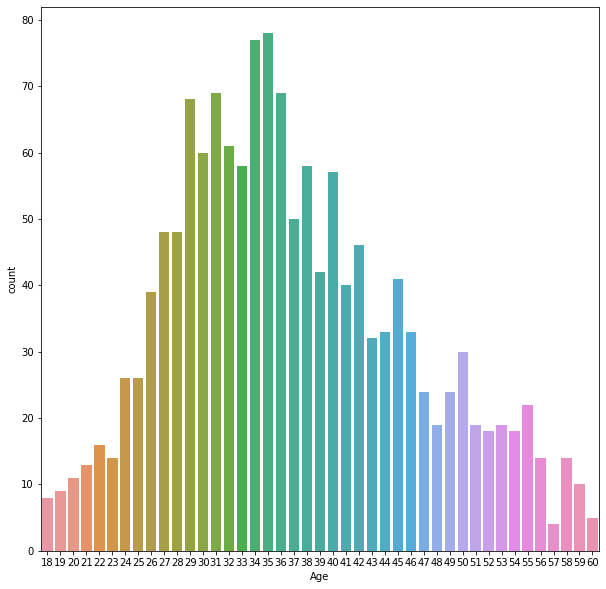

In [12]:
plt.figure(figsize=(10,10))
sns.countplot(hr['Age'])

1. We observe that most of the employee in the company falls in the age group of 25-45. 
2. Also the age data is normally distributed.

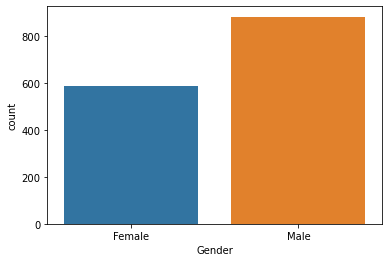

In [13]:
sns.countplot(hr['Gender'])

The company has more male employees than female.

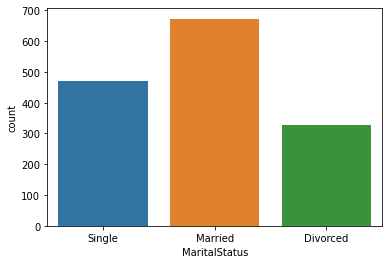

In [14]:
sns.countplot(hr['MaritalStatus'])

We observe three marital status as single, Married and Divorced. And Married employee are more in number.

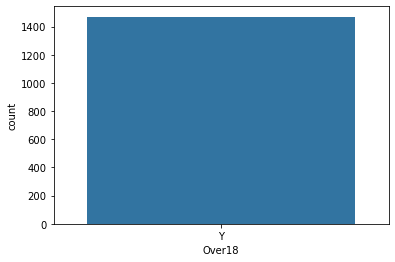

In [15]:
sns.countplot(hr['Over18'])

In [16]:
hr['Over18'].unique()

array(['Y'], dtype=object)

Over18 is a feature with constant entry for all employees as all the employees are over 18. This feature will not help in the ML.

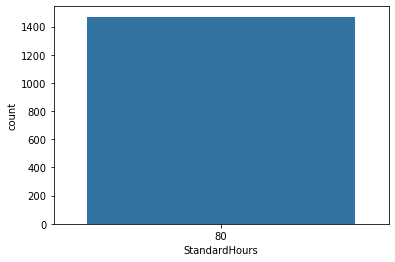

In [17]:
sns.countplot(hr['StandardHours'])

In [18]:
hr['StandardHours'].unique()

array([80], dtype=int64)

This feature is also constant for every employee. This feature too is a reduntant feature.

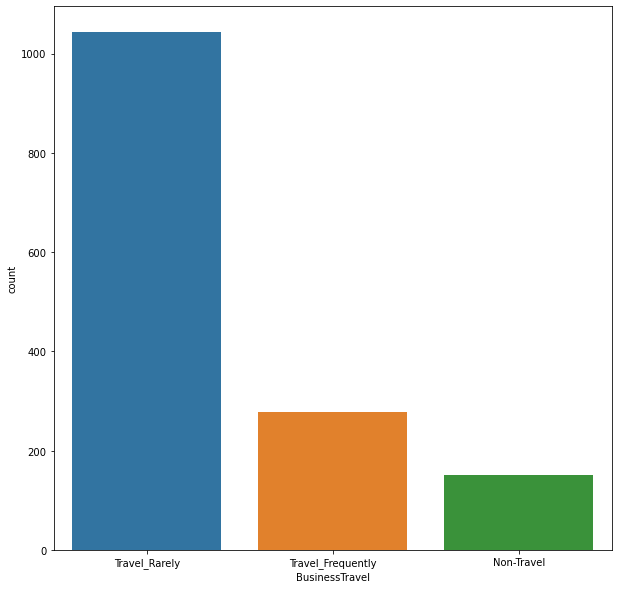

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(hr['BusinessTravel'])

There are a huge number of employees who travel rarely for the work.

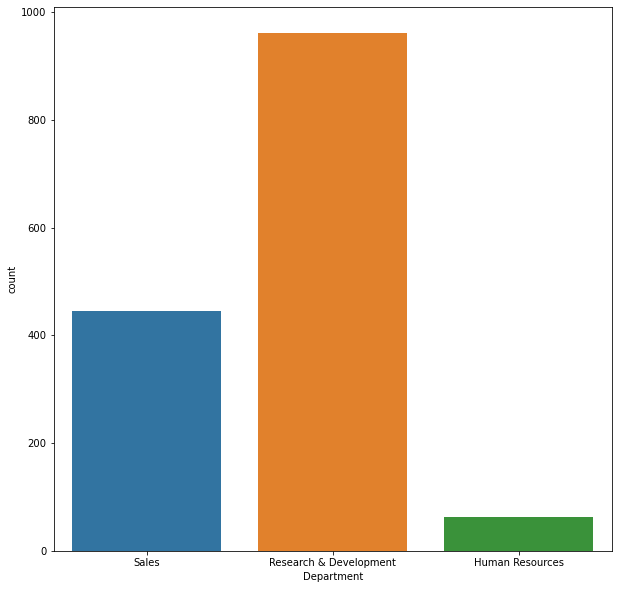

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(hr['Department'])

Most of the employees in the data are in the research and development department.

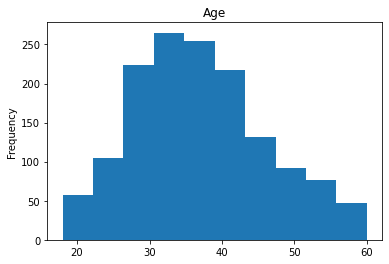

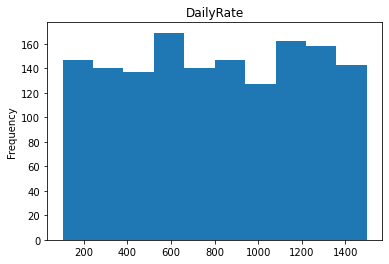

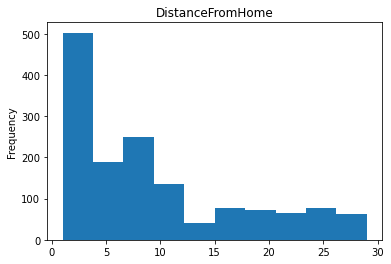

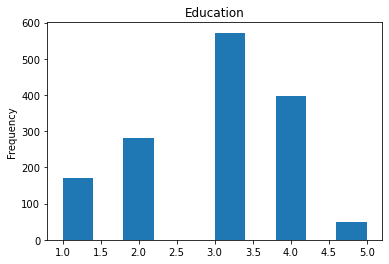

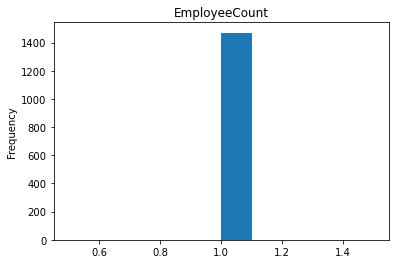

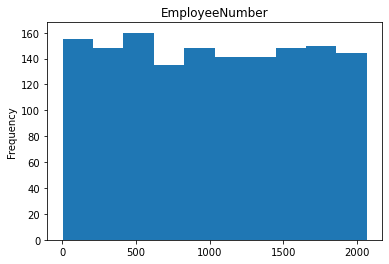

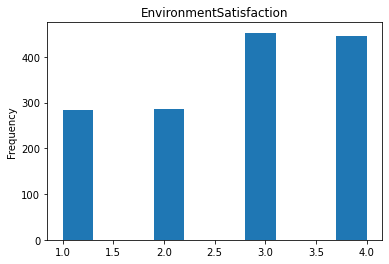

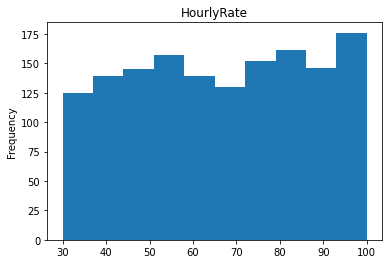

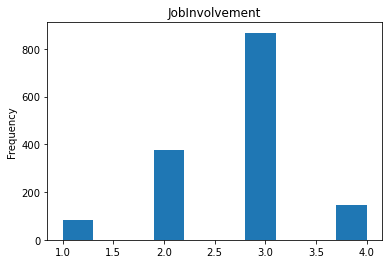

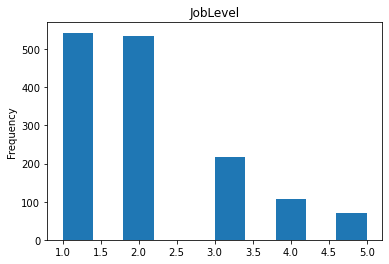

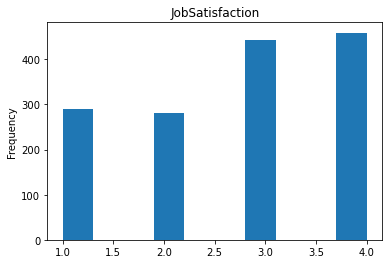

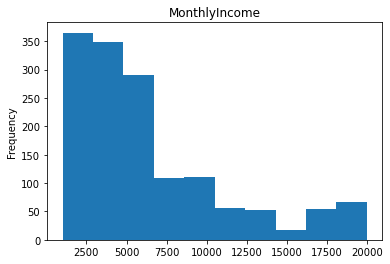

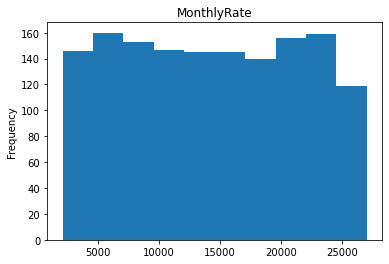

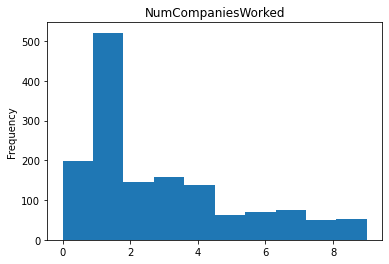

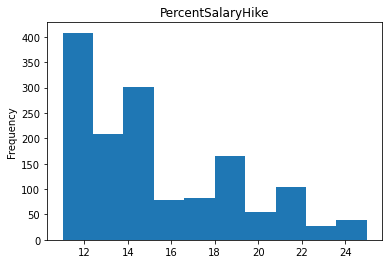

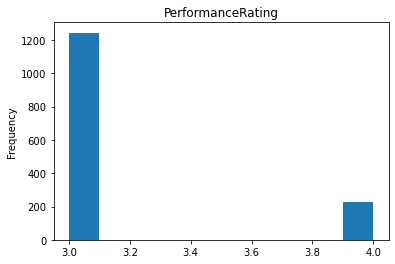

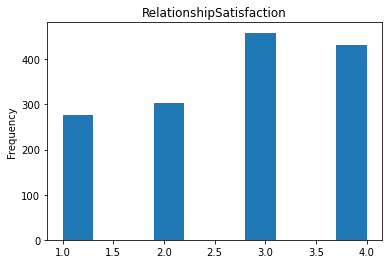

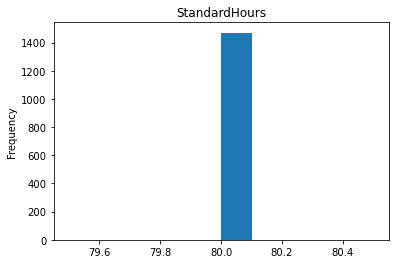

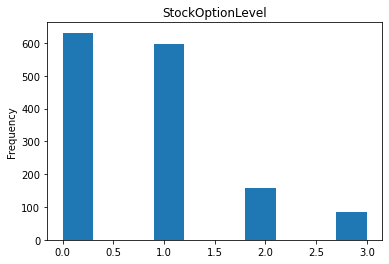

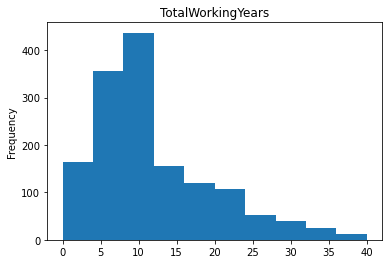

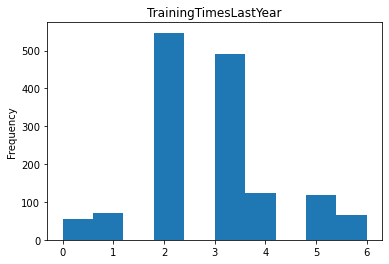

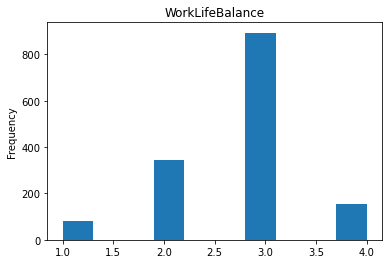

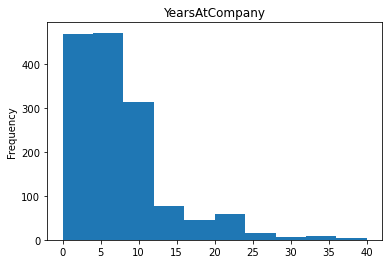

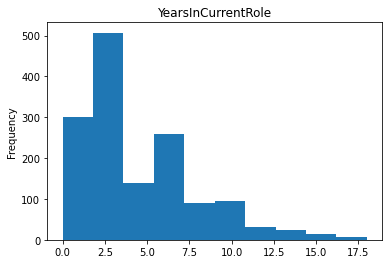

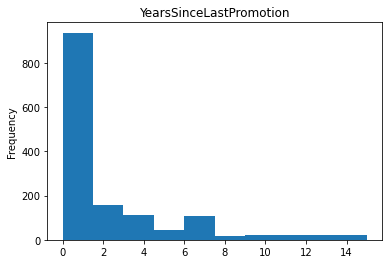

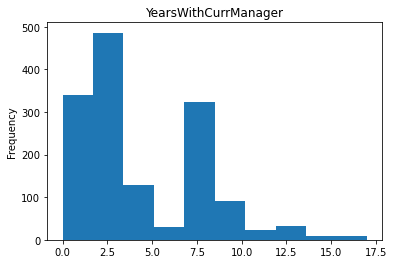

In [21]:
for i in hr.columns:
    if hr.dtypes.loc[i]=='int64':
        hr[i].plot.hist()
        plt.title(i)
        plt.show()

Observations:
    1. Several features i.e. distanceFromHome,MonthlyIncome, TotalWorkingYears,YearsAtCompany etc, are rightly skewed. These are to be dealt prior our model fitting.
    2.EmployeeCount and StandardHours are the features that are the same for all employees. These features contribute nothing to the target variable.

Bi-variate analysis:

Attrition is a categorical data with yes or no as the entries. So to be able to comapre it with other categorical data we need to convert attrition into binary data i.e. 0 and 1 using label encoder.

In [22]:
le=LabelEncoder()

In [23]:
hr['Attrition']=le.fit_transform(hr['Attrition'].astype(str))

In [24]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


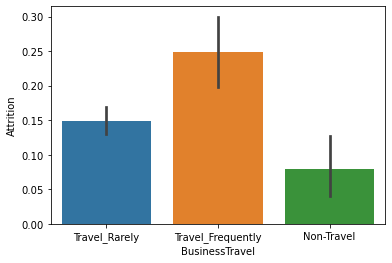

In [25]:
sns.barplot(x='BusinessTravel',y='Attrition',data=hr)

There is a significant number of employees who travel frequently with a higher Attrition rate.

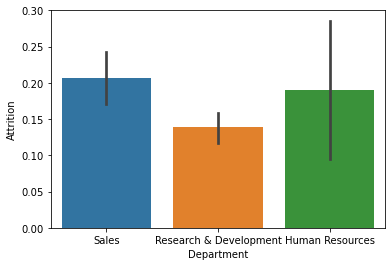

In [26]:
sns.barplot(x='Department',y='Attrition',data=hr)

Employees of sales department have a slight higher attrition rate and employee from Research and development department has the lowest among the three.

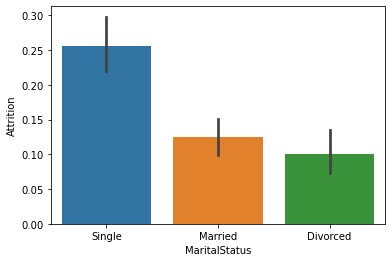

In [27]:
sns.barplot(x='MaritalStatus',y='Attrition',data=hr)

Single employees are the one with the higher attrition rate followed by Married and Divorced.

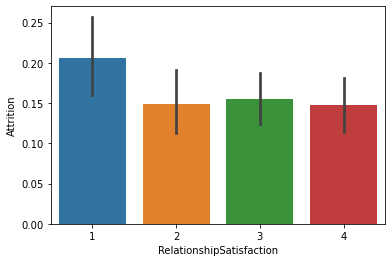

In [28]:
sns.barplot(x='RelationshipSatisfaction',y='Attrition',data=hr)

There is no significant difference in the attrition rate of employees with varying relationship satisfaction rate.

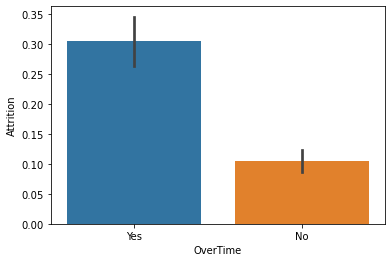

In [29]:
sns.barplot(x='OverTime',y='Attrition',data=hr)

For employees who are working over time are much likely to leave the company as they have a higher attrition rate.

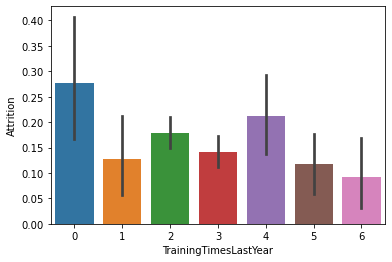

In [30]:
sns.barplot(x='TrainingTimesLastYear',y='Attrition',data=hr)

For those who havent done any training attrition rate is high. Apart from that theres no indication of a higher attrition because of less traninig hours.

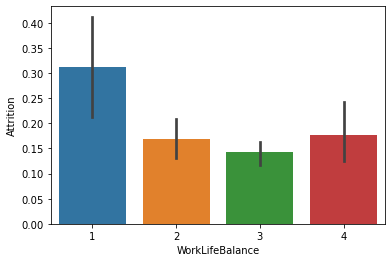

In [31]:
sns.barplot(x='WorkLifeBalance',y='Attrition',data=hr)

Employee having a low work life balance tend to have higher attrition rate.

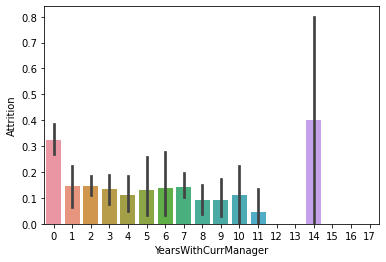

In [32]:
sns.barplot(x='YearsWithCurrManager',y='Attrition',data=hr)

Employees who are either for a short period of time with current manager or the highest period of time have a high attrition rate.

In [33]:
#Statistical analysis
hr.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


As we have number of columns that are not visible in the table above. To analyze all the columns lets draw dist plot and box plot to see if the data is skewed and has outliers.

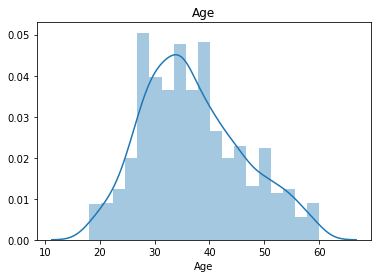

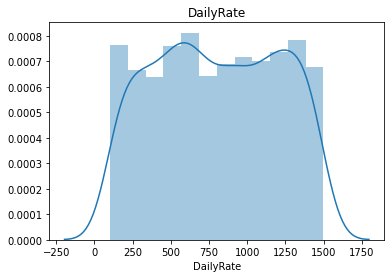

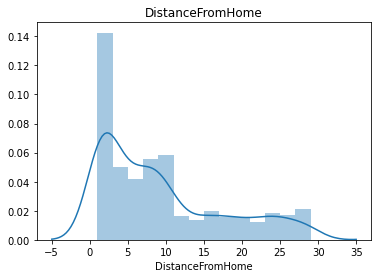

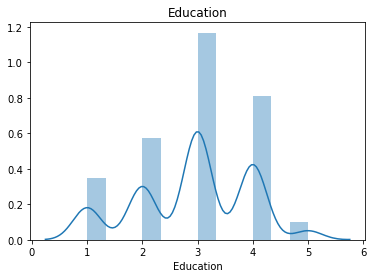

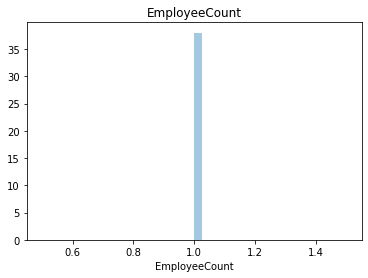

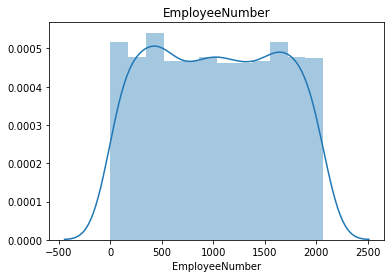

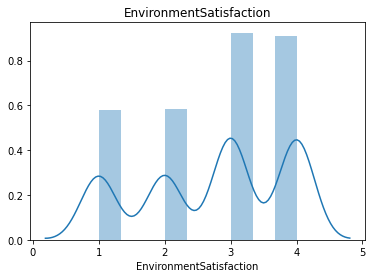

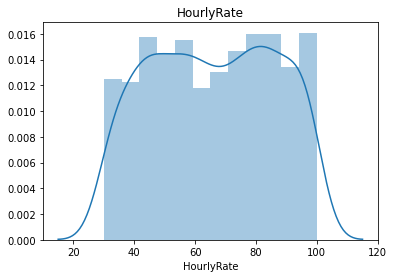

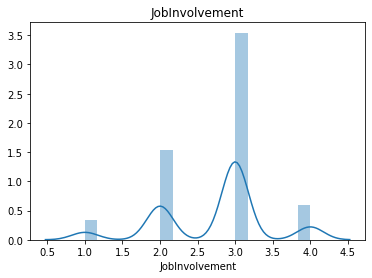

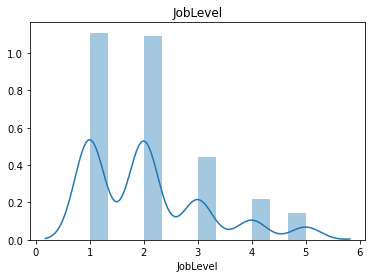

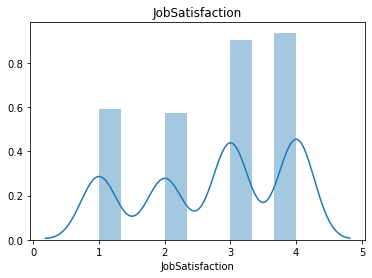

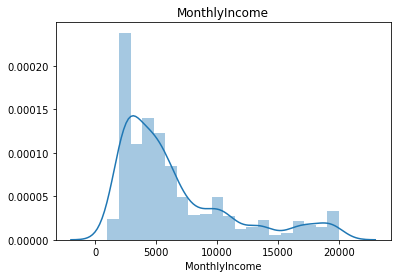

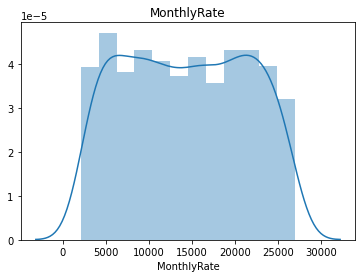

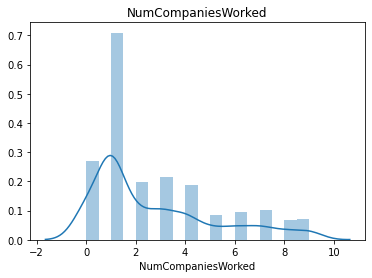

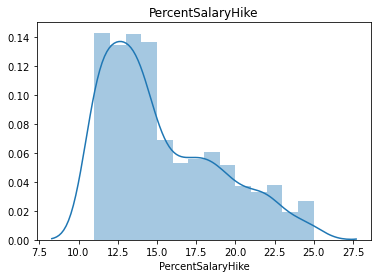

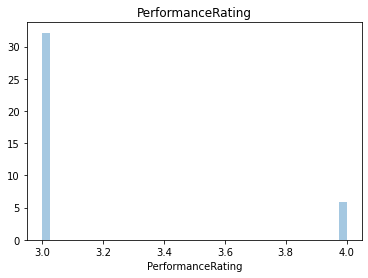

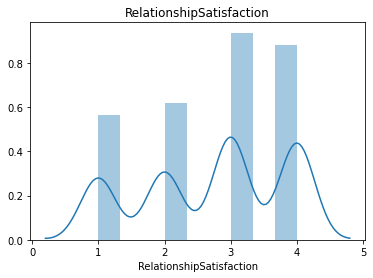

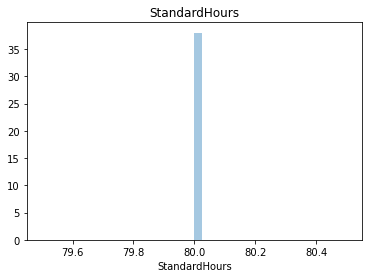

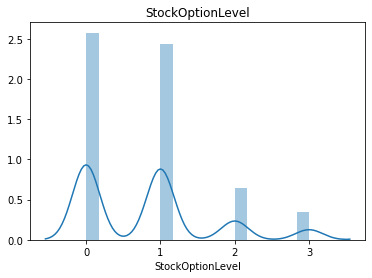

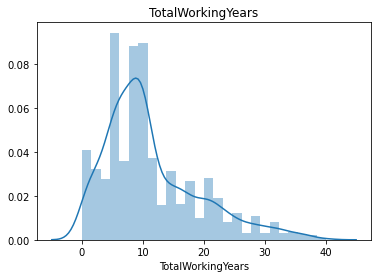

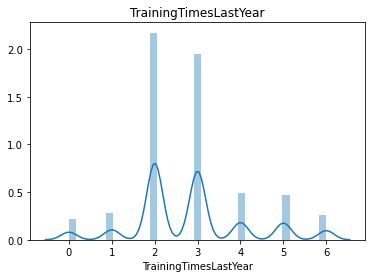

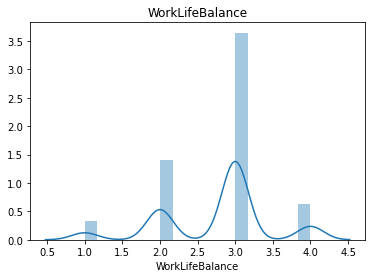

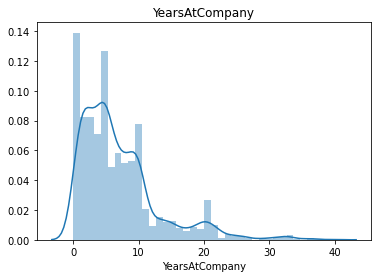

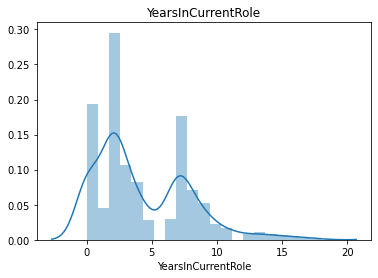

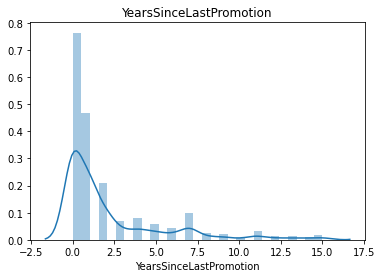

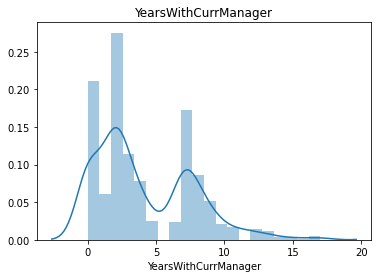

In [34]:
for i in hr.columns:
    if hr.dtypes.loc[i]=='int64':
        sns.distplot(hr[i])
        plt.title(i)
        plt.show()

It can be observed that features: DistanceFromHome, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, TotalWorkingHours, YearsSinceLastPromotion, YearsAtCompany these features are skewed.  

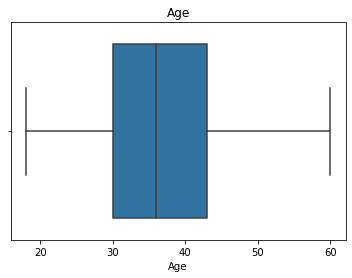

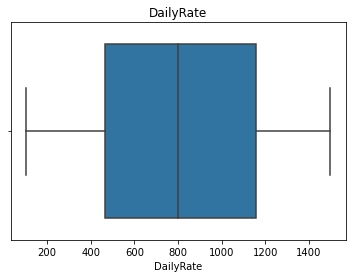

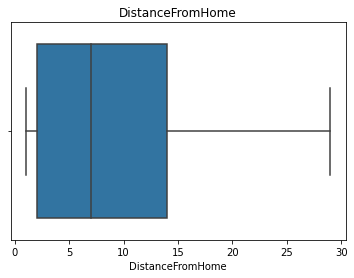

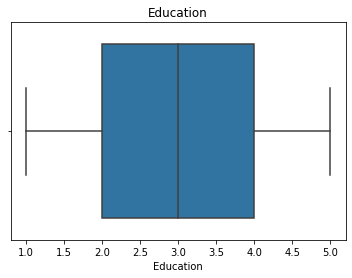

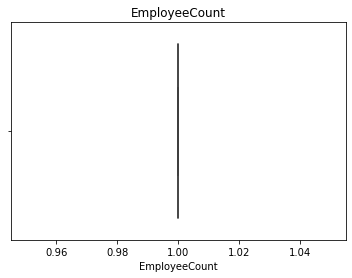

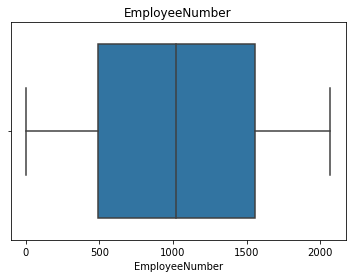

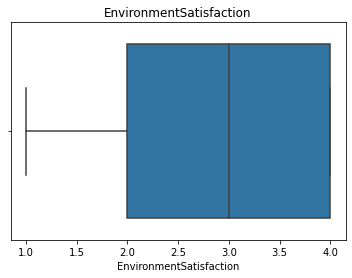

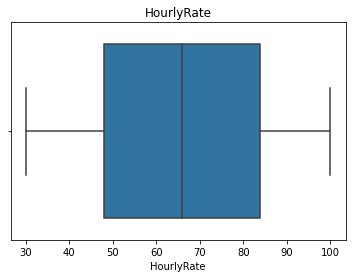

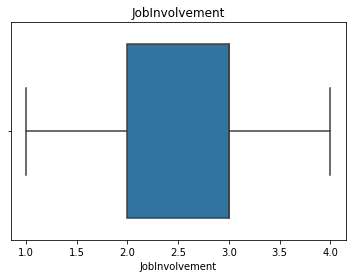

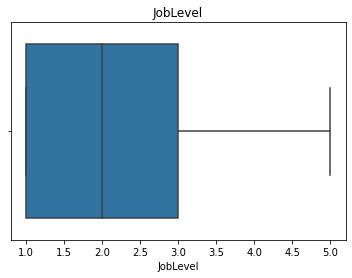

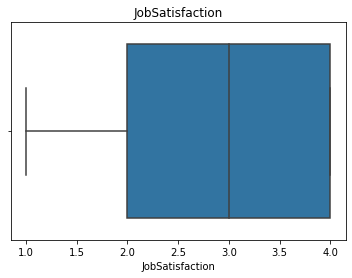

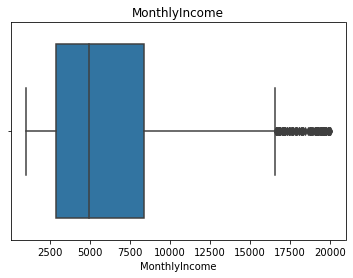

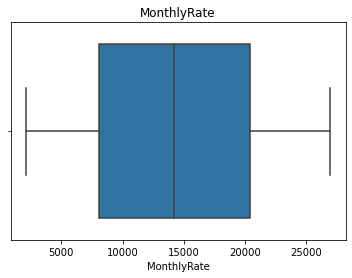

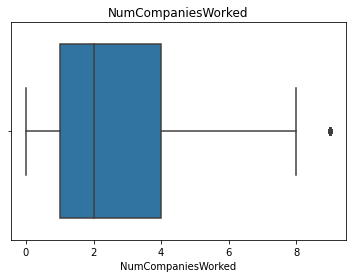

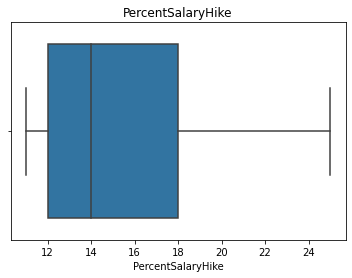

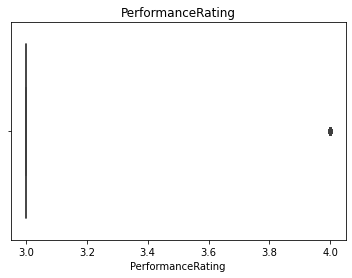

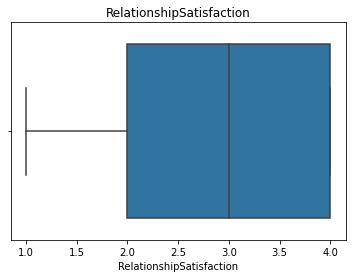

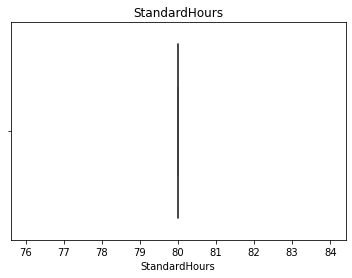

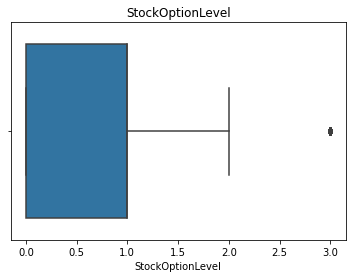

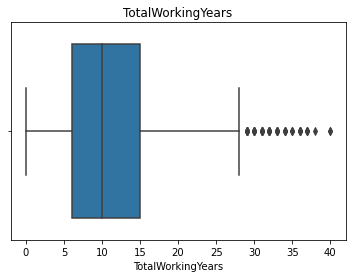

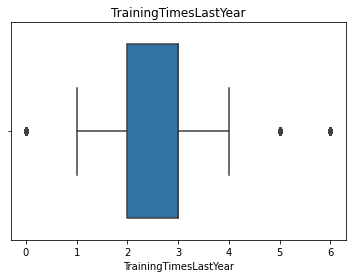

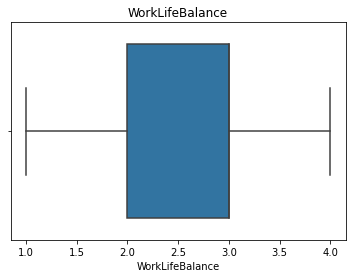

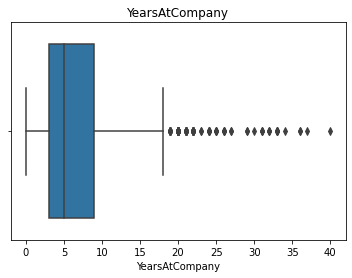

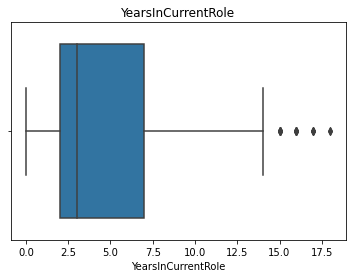

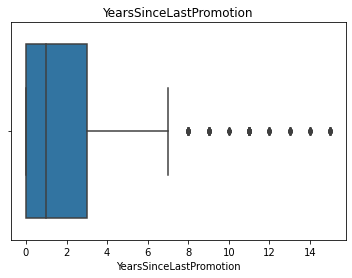

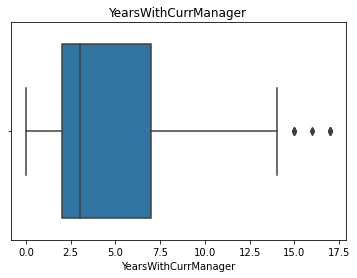

In [35]:
for i in hr.columns:
    if hr.dtypes.loc[i]=='int64':
        sns.boxplot(hr[i])
        plt.title(i)
        plt.show()

MonthlyIncome, PercentSalaryHike, TotalWorkingHours, YearsAtCompany, YearsInCurrrentRole, YearsSinceLastPromotion have certain outliers present that need to be treated.

We will now first convert the categorical data and will then proceed with the correlation. 

In [36]:
for i in hr.columns:
    if hr.dtypes.loc[i]=='object':
        hr[i]=le.fit_transform(hr[i].astype(str))

In [37]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [38]:
hr.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


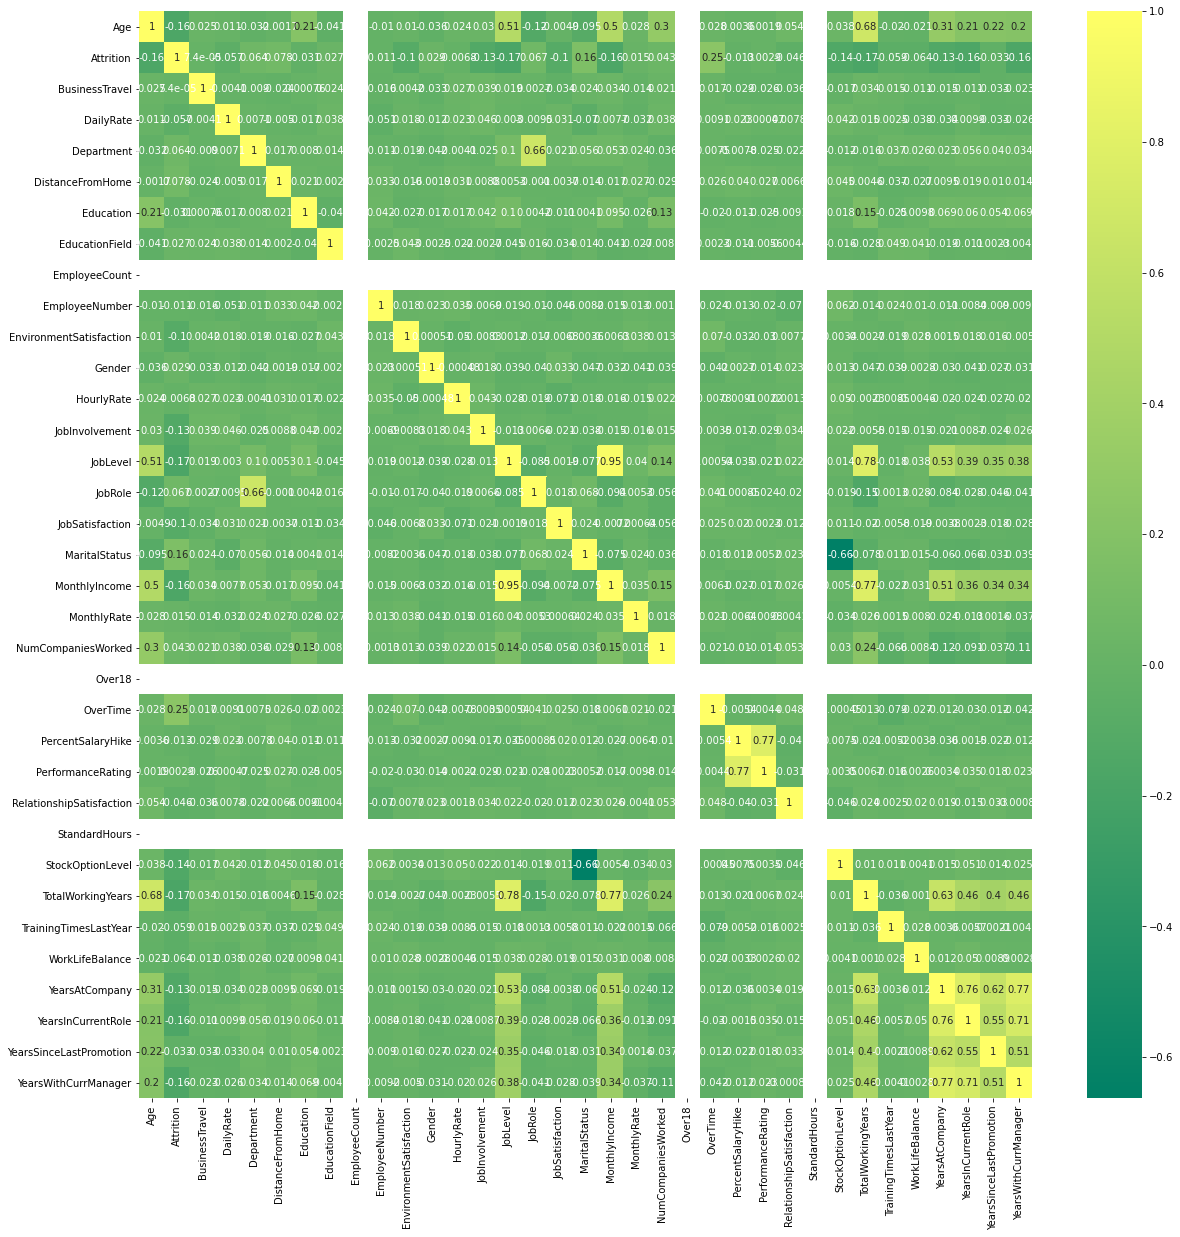

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(hr.corr(),cmap='summer',annot=True)

Observations:
    1. YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager are positively correlated with each other.
    2. PercentSalaryHike, PerformanceRating are positivly correlated.
    3.Attrition has a negative correlation with age.

Dropping the features with constant entry i.e. Over18, StandardHours, EmployeeCount.

In [40]:
hr.drop(['Over18','StandardHours','EmployeeCount'],axis=1,inplace=True)

In [41]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [42]:
#Checking the skewness of the data
hr.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

Here some of the features are skewed. Removing skewness using Power Transformer.

In [43]:
pt=PowerTransformer(method='yeo-johnson')
list=['Age', 'BusinessTravel', 'DailyRate', 'Department','DistanceFromHome', 'Education', 'EducationField','EmployeeNumber','EnvironmentSatisfaction', 'Gender', 'HourlyRate','JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction','MaritalStatus', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating','RelationshipSatisfaction', 'StockOptionLevel','TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']
for i in list:
    if hr.skew().loc[i]>0.55:
        hr[i]=pt.fit_transform(hr[i].values.reshape(-1,1))
    if hr.skew().loc[i]<-0.55:
        hr[i]=pt.fit_transform(hr[i].values.reshape(-1,1))
    else:
        hr[i]=hr[i]          

In [44]:
hr.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -0.970506
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.007468
Education                  -0.289681
EducationField             -0.008386
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.103624
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
W

In [45]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.635468,1102,2,-1.494085,2,-0.960488,1,2,...,-0.423557,1,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,49,0,-1.392865,279,1,0.243416,1,-0.960488,2,3,...,2.348814,4,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,37,1,0.635468,1373,1,-1.031215,2,1.247620,4,4,...,-0.423557,2,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,33,0,-1.392865,1392,1,-0.700347,4,-0.960488,5,4,...,-0.423557,3,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,27,0,0.635468,591,1,-1.031215,1,0.697390,7,1,...,-0.423557,4,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,-1.392865,884,1,1.407126,2,0.697390,2061,3,...,-0.423557,3,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,39,0,0.635468,613,1,-0.050827,1,0.697390,2062,4,...,-0.423557,1,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,27,0,0.635468,155,1,-0.442291,3,-0.960488,2064,2,...,2.348814,2,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,49,0,-1.392865,1023,2,-1.031215,3,0.697390,2065,4,...,-0.423557,4,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [46]:
hr['MonthlyIncome']

0       5993
1       5130
2       2090
3       2909
4       3468
        ... 
1465    2571
1466    9991
1467    6142
1468    5390
1469    4404
Name: MonthlyIncome, Length: 1470, dtype: int64

In [47]:
#Removing outliers using zscore
z=np.abs(zscore(hr))

In [48]:
#treshold=3
hr_new=hr[(z<3).all(axis=1)]

In [49]:
hr_new

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0.635468,1102,2,-1.494085,2,-0.960488,1,2,...,-0.423557,1,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,49,0,-1.392865,279,1,0.243416,1,-0.960488,2,3,...,2.348814,4,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,37,1,0.635468,1373,1,-1.031215,2,1.247620,4,4,...,-0.423557,2,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,33,0,-1.392865,1392,1,-0.700347,4,-0.960488,5,4,...,-0.423557,3,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,27,0,0.635468,591,1,-1.031215,1,0.697390,7,1,...,-0.423557,4,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,-1.392865,884,1,1.407126,2,0.697390,2061,3,...,-0.423557,3,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,39,0,0.635468,613,1,-0.050827,1,0.697390,2062,4,...,-0.423557,1,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,27,0,0.635468,155,1,-0.442291,3,-0.960488,2064,2,...,2.348814,2,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,49,0,-1.392865,1023,2,-1.031215,3,0.697390,2065,4,...,-0.423557,4,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [50]:
print('Shape before removing outliers:',hr.shape)
print('Shape after removing outliers: ',hr_new.shape)

Shape before removing outliers: (1470, 32)
Shape after removing outliers:  (1470, 32)


In [51]:
hr_new.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -0.970506
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome           -0.007468
Education                  -0.289681
EducationField             -0.008386
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.103624
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
W

Splitting the data into x and y

In [52]:
x=hr_new.drop(['Attrition'],axis=1)
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.635468,1102,2,-1.494085,2,-0.960488,1,2,0,...,-0.423557,1,-1.087933,-0.244305,-2.579073,-2.144446,0.139692,0.205562,-1.094862,0.490147
1,49,-1.392865,279,1,0.243416,1,-0.960488,2,3,1,...,2.348814,4,0.548969,0.052495,0.217384,0.276821,0.762660,0.883888,0.096854,0.909635
2,37,0.635468,1373,1,-1.031215,2,1.247620,4,4,1,...,-0.423557,2,-1.087933,-0.410500,0.217384,0.276821,-2.229592,-1.596434,-1.094862,-1.550156
3,33,-1.392865,1392,1,-0.700347,4,-0.960488,5,4,0,...,-0.423557,3,-1.087933,-0.244305,0.217384,0.276821,0.482432,0.883888,0.905592,-1.550156
4,27,0.635468,591,1,-1.031215,1,0.697390,7,1,1,...,-0.423557,4,0.548969,-0.592063,0.217384,0.276821,-0.951540,-0.446645,0.607464,-0.406881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,-1.392865,884,1,1.407126,2,0.697390,2061,3,1,...,-0.423557,3,0.548969,0.859893,0.217384,0.276821,-0.066114,-0.446645,-1.094862,-0.053000
1466,39,0.635468,613,1,-0.050827,1,0.697390,2062,4,1,...,-0.423557,1,0.548969,-0.090665,1.615639,0.276821,0.320677,0.883888,0.096854,0.909635
1467,27,0.635468,155,1,-0.442291,3,-0.960488,2064,2,1,...,2.348814,2,0.548969,-0.592063,-2.579073,0.276821,0.139692,-0.446645,-1.094862,-0.053000
1468,49,-1.392865,1023,2,-1.031215,3,0.697390,2065,4,1,...,-0.423557,4,-1.087933,0.859893,0.217384,-1.108624,0.628829,0.682995,-1.094862,1.090110


In [53]:
y=hr_new['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [54]:
#applying standard Scaler
mnm=MinMaxScaler()

In [55]:
x1=mnm.fit_transform(x)
x=pd.DataFrame(x1,columns=x.columns)

In [56]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,1.000000,0.715820,1.0,0.000000,0.25,0.372752,0.000000,0.333333,0.0,...,0.0,0.000000,0.000000,0.458154,0.000000,0.000000,0.475475,0.455329,0.000000,0.534835
1,0.738095,0.182761,0.126700,0.5,0.548210,0.00,0.372752,0.000484,0.666667,1.0,...,1.0,1.000000,0.569763,0.516731,0.579282,0.584477,0.600494,0.626729,0.407877,0.644798
2,0.452381,1.000000,0.909807,0.5,0.146043,0.25,0.892699,0.001451,1.000000,1.0,...,0.0,0.333333,0.000000,0.425354,0.579282,0.584477,0.000000,0.000000,0.000000,0.000000
3,0.357143,0.182761,0.923407,0.5,0.250437,0.75,0.372752,0.001935,1.000000,0.0,...,0.0,0.666667,0.000000,0.458154,0.579282,0.584477,0.544257,0.626729,0.684677,0.000000
4,0.214286,1.000000,0.350036,0.5,0.146043,0.00,0.763135,0.002903,0.000000,1.0,...,0.0,1.000000,0.569763,0.389521,0.579282,0.584477,0.256483,0.290529,0.582639,0.299693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.182761,0.559771,0.5,0.915380,0.25,0.763135,0.996613,0.666667,1.0,...,0.0,0.666667,0.569763,0.676079,0.579282,0.584477,0.434173,0.290529,0.000000,0.392457
1466,0.500000,1.000000,0.365784,0.5,0.455371,0.00,0.763135,0.997097,1.000000,1.0,...,0.0,0.000000,0.569763,0.488477,0.868928,0.584477,0.511796,0.626729,0.407877,0.644798
1467,0.214286,1.000000,0.037938,0.5,0.331858,0.50,0.372752,0.998065,0.333333,1.0,...,1.0,0.333333,0.569763,0.389521,0.000000,0.584477,0.475475,0.290529,0.000000,0.392457
1468,0.738095,0.182761,0.659270,1.0,0.146043,0.50,0.763135,0.998549,1.000000,1.0,...,0.0,1.000000,0.000000,0.676079,0.579282,0.250040,0.573636,0.575967,0.000000,0.692107


In [57]:
list=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
for j in list:
    r_max=0
    print('for the algorithm: ',j)
    for i in range(33,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
        j.fit(x_train,y_train)
        pred=j.predict(x_test)
        accuracy=accuracy_score(pred,y_test)
        print('accuracy score corresponding to random state',i,'is: ',accuracy)
        if accuracy>r_max:
            r_max=accuracy
            final=i
    print('\n')
    print('Max accuracy score corresponding to: ', final,'is: ',r_max)
    print('\n')

for the algorithm:  LogisticRegression()
accuracy score corresponding to random state 33 is:  0.8532608695652174
accuracy score corresponding to random state 34 is:  0.8722826086956522
accuracy score corresponding to random state 35 is:  0.8913043478260869
accuracy score corresponding to random state 36 is:  0.8804347826086957
accuracy score corresponding to random state 37 is:  0.8777173913043478
accuracy score corresponding to random state 38 is:  0.8722826086956522
accuracy score corresponding to random state 39 is:  0.8804347826086957
accuracy score corresponding to random state 40 is:  0.8967391304347826
accuracy score corresponding to random state 41 is:  0.8777173913043478
accuracy score corresponding to random state 42 is:  0.8967391304347826
accuracy score corresponding to random state 43 is:  0.8315217391304348
accuracy score corresponding to random state 44 is:  0.8831521739130435
accuracy score corresponding to random state 45 is:  0.8505434782608695
accuracy score correspo

In [58]:
list=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=73)
for j in list:
    print('for the algorithm: ',j)
    j.fit(x_train,y_train)
    scr=j.score(x_train,y_train)
    pred=j.predict(x_test)
    accuracy=accuracy_score(pred,y_test)
    print('The score is: ',scr)
    print('Accuracy score is: ',accuracy)
    print('confusion matrix: \n',confusion_matrix(pred,y_test))
    print('classification report: \n',classification_report(pred,y_test))
    print('================================================================')

for the algorithm:  LogisticRegression()
The score is:  0.8738656987295825
Accuracy score is:  0.8858695652173914
confusion matrix: 
 [[304  31]
 [ 11  22]]
classification report: 
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       335
           1       0.42      0.67      0.51        33

    accuracy                           0.89       368
   macro avg       0.69      0.79      0.72       368
weighted avg       0.92      0.89      0.90       368

for the algorithm:  GaussianNB()
The score is:  0.8239564428312159
Accuracy score is:  0.7907608695652174
confusion matrix: 
 [[265  27]
 [ 50  26]]
classification report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87       292
           1       0.49      0.34      0.40        76

    accuracy                           0.79       368
   macro avg       0.67      0.62      0.64       368
weighted avg       0.77      0.79      0.78  

In [90]:
list=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
for i in list:
    print(i,'\n')
    score=cross_val_score(i,x,y,cv=5,scoring='accuracy')
    print('Score: ',score)
    print('Mean score :',score.mean())
    print('Standard Deviation :',score.std())
    print('*****************************************************\n')

LogisticRegression() 

Score:  [0.86734694 0.8537415  0.86734694 0.87414966 0.88095238]
Mean score : 0.8687074829931973
Standard Deviation : 0.009024829361511303
*****************************************************

GaussianNB() 

Score:  [0.85034014 0.80272109 0.79591837 0.79251701 0.85714286]
Mean score : 0.8197278911564625
Standard Deviation : 0.028048337589235764
*****************************************************

SVC() 

Score:  [0.87414966 0.85034014 0.87755102 0.86054422 0.88435374]
Mean score : 0.8693877551020407
Standard Deviation : 0.012282632711066537
*****************************************************

DecisionTreeClassifier() 

Score:  [0.77891156 0.78231293 0.82312925 0.76530612 0.7755102 ]
Mean score : 0.7850340136054421
Standard Deviation : 0.019879781219323094
*****************************************************

KNeighborsClassifier() 

Score:  [0.84693878 0.83673469 0.84353741 0.84353741 0.86054422]
Mean score : 0.8462585034013606
Standard Deviation : 0.007874

In [92]:
#Using some ensemble techniques to boost our model.
model=(RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier())
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=78)
for i in model:
    print("For model: ",i)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('Score: ',i.score(x_train,y_train))
    print('Accuracy score: ',accuracy_score(pred,y_test))
    print('Confusion matrix: \n',confusion_matrix(pred,y_test))
    print('classification report: \n',classification_report(pred,y_test))
    print('===========================================================')

For model:  RandomForestClassifier()
Score:  1.0
Accuracy score:  0.8831521739130435
Confusion matrix: 
 [[321  43]
 [  0   4]]
classification report: 
               precision    recall  f1-score   support

           0       1.00      0.88      0.94       364
           1       0.09      1.00      0.16         4

    accuracy                           0.88       368
   macro avg       0.54      0.94      0.55       368
weighted avg       0.99      0.88      0.93       368

For model:  AdaBoostClassifier()
Score:  0.8920145190562614
Accuracy score:  0.8804347826086957
Confusion matrix: 
 [[311  34]
 [ 10  13]]
classification report: 
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       345
           1       0.28      0.57      0.37        23

    accuracy                           0.88       368
   macro avg       0.62      0.73      0.65       368
weighted avg       0.93      0.88      0.90       368

For model:  GradientBoostingC

In [88]:
model=[RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier()]
for i in model:
    print(i,'\n')
    score=cross_val_score(i,x,y,cv=5,scoring='accuracy')
    print('Score: ',score)
    print('Mean score :',score.mean())
    print('Standard Deviation :',score.std())
    print('*****************************************************\n')

RandomForestClassifier() 

Score:  [0.84353741 0.86394558 0.85714286 0.86054422 0.86054422]
Mean score : 0.8571428571428571
Standard Deviation : 0.00713475406918467
*****************************************************

AdaBoostClassifier() 

Score:  [0.83673469 0.86734694 0.85714286 0.88435374 0.84013605]
Mean score : 0.8571428571428571
Standard Deviation : 0.01760840694631941
*****************************************************

GradientBoostingClassifier() 

Score:  [0.84693878 0.87414966 0.87414966 0.85714286 0.86054422]
Mean score : 0.8625850340136054
Standard Deviation : 0.010450538432474276
*****************************************************

BaggingClassifier() 

Score:  [0.83673469 0.83673469 0.8707483  0.8537415  0.8707483 ]
Mean score : 0.8537414965986395
Standard Deviation : 0.015211346785712822
*****************************************************



In [60]:
#Using GridSearchCv to find out best parameters for SVC
parameters={ 'C' :[1,10],'kernel':['linear','poly','rbf']}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 10, 'kernel': 'linear'}


In [61]:
#Using GridSearchCv to find out best parameters for KNeighborsClassifier
parameters={ 'n_neighbors' :[1,10],'weights':['uniform','distance']}
knc=KNeighborsClassifier()
clf=GridSearchCV(knc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'n_neighbors': 10, 'weights': 'distance'}


In [62]:
#Using GridSearchCv to find out best parameters for RandomForestClassifier
parameters={ 'n_estimators' :[100,200,300],'criterion':['gini','entropy']}
rfc=RandomForestClassifier()
clf=GridSearchCV(rfc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'entropy', 'n_estimators': 100}


In [63]:
#Using GridSearchCV to find out the best parameters for GradientBoostingClassifier
parameters={ 'n_estimators' :[100,200,300],'criterion':['friedman_mse','mse','mae']}
gbc=GradientBoostingClassifier()
clf=GridSearchCV(gbc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 100}


Applying the results of GridSearchCV in the models

In [95]:
SV=SVC(C=10, kernel='linear')
KN=KNeighborsClassifier(n_neighbors= 10, weights= 'distance')
RF=RandomForestClassifier(criterion= 'entropy', n_estimators= 100)
GB=GradientBoostingClassifier(criterion='friedman_mse', n_estimators=100)

In [96]:
models=[]
models.append(('SupportVectorClassifier',SV))
models.append(('KNeighborsClassifier',KN))
models.append(('RandomForestClassifier',RF))
models.append(('GradientBoostingClassifier',GB))

SupportVectorClassifier :

SVC(C=10, kernel='linear')


Accuracy Score:  0.8885869565217391


Cross Val Score:  0.8748299319727891


AUC_ROC_Score 0.6183137800755617


[[315   6]
 [ 35  12]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       321
           1       0.67      0.26      0.37        47

    accuracy                           0.89       368
   macro avg       0.78      0.62      0.65       368
weighted avg       0.87      0.89      0.87       368



AxesSubplot(0.125,0.808774;0.775x0.0712264)


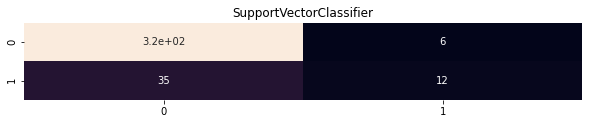

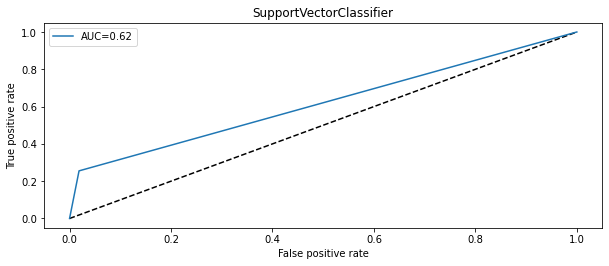



KNeighborsClassifier :

KNeighborsClassifier(n_neighbors=10, weights='distance')


Accuracy Score:  0.8777173913043478


Cross Val Score:  0.8551020408163265


AUC_ROC_Score 0.5394379266918539


[[319   2]
 [ 43   4]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       321
           1       0.67      0.09      0.15        47

    accuracy                           0.88       368
   macro avg       0.77      0.54      0.54       368
weighted avg       0.85      0.88      0.83       368



AxesSubplot(0.125,0.808774;0.775x0.0712264)


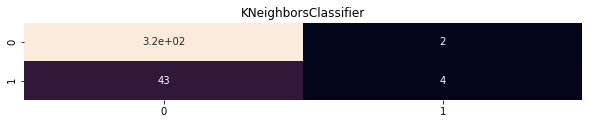

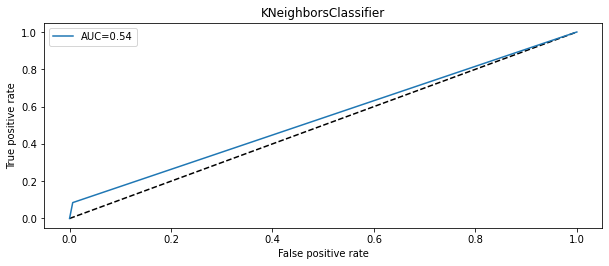



RandomForestClassifier :

RandomForestClassifier(criterion='entropy')


Accuracy Score:  0.8831521739130435


Cross Val Score:  0.8571428571428571


AUC_ROC_Score 0.5607145224365347


[[319   2]
 [ 41   6]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       321
           1       0.75      0.13      0.22        47

    accuracy                           0.88       368
   macro avg       0.82      0.56      0.58       368
weighted avg       0.87      0.88      0.85       368



AxesSubplot(0.125,0.808774;0.775x0.0712264)


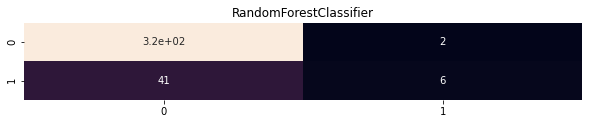

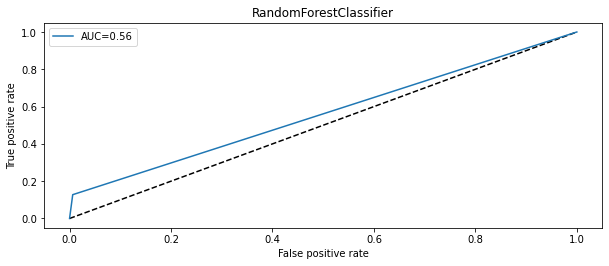



GradientBoostingClassifier :

GradientBoostingClassifier()


Accuracy Score:  0.8913043478260869


Cross Val Score:  0.8619047619047618


AUC_ROC_Score 0.6107907470007291


[[317   4]
 [ 36  11]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       321
           1       0.73      0.23      0.35        47

    accuracy                           0.89       368
   macro avg       0.82      0.61      0.65       368
weighted avg       0.88      0.89      0.87       368



AxesSubplot(0.125,0.808774;0.775x0.0712264)


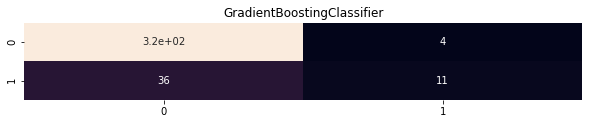

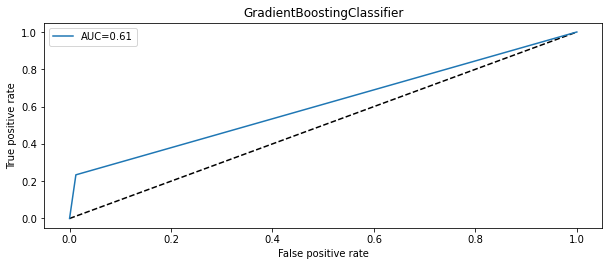

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=78)
Model=[]
Score=[]
CVS=[]
Roc_Score=[]

for name,model in models:
    print(name,':\n')
    Model.append(name)
    
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy score
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score: ',AS)
    Score.append(AS*100)
    print('\n')
    
    #cross val score
    cross_val=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('Cross Val Score: ',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_Score
    false_positive_rate,true_positive_rate,threshold=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("AUC_ROC_Score",roc_auc)
    Roc_Score.append(roc_auc*100)
    print("\n")
    
    #Confusion Matrix
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    
    #Classification Report
    print("Classification Report: \n",classification_report(y_test,pred))
    print('\n')
    
    #Confusion Matrix using Heatmap
    plt.figure(figsize=(10,15))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True,cbar=False))
    plt.show()
    print('\n')
    
    
    #Auc_Roc_curve
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%.2f'%roc_auc)
    plt.legend(loc='Lower Right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.show()
    print('\n')
    

In [104]:
pd.DataFrame({"Model":Model,"Accuracy Score":Score,'Cross Val Score':CVS,'ROC_AUC_Score':Roc_Score})

,Model,Accuracy Score,Cross Val Score,ROC_AUC_Score
0,SupportVectorClassifier,88.858696,87.482993,61.831378
1,KNeighborsClassifier,87.771739,85.510204,53.943793
2,RandomForestClassifier,88.315217,85.714286,56.071452
3,GradientBoostingClassifier,89.130435,86.190476,61.079075


In [98]:
#Saving GradientBoostingClassifier as it is enhancing the performance, also it overcomes over fitting.
import joblib
joblib.dump(GB,'hr_attrition.pkl')

['hr_attrition.pkl']